In [1]:
import tensorflow.keras.models as models
import numpy as np

path_weight = 'weights/prop_tiramisu_weights_67_12_func_10-e7_decay150.hdf5'

with open('tiramisu_fc_dense67_model_12_func.json') as model_file:
    tiramisu = models.model_from_json(model_file.read())

tiramisu.load_weights(path_weight)

tiramisu.summary()

test_data = np.load('./data/test_data.npy')
test_data = test_data.reshape((233, 224, 224, 3))


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 224, 224, 48) 1344        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 224, 224, 48) 192         conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 224, 224, 48) 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

In [50]:
result = tiramisu.predict(test_data[2].reshape(-1, 224, 224, 3)).reshape(-1, 224, 224, 12)

In [51]:
print(max(test_data[0].flatten()))
print(min(test_data[0].flatten()))

255.0
0.0


(233, 224, 224, 3)
(1, 224, 224, 12)


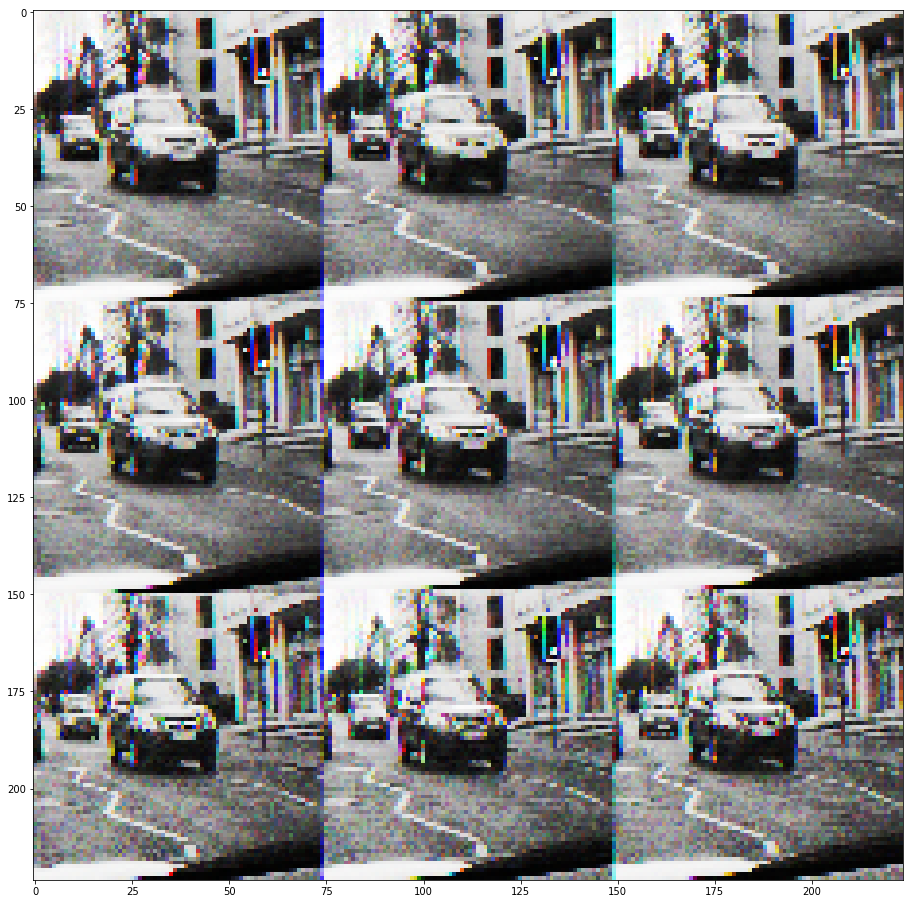

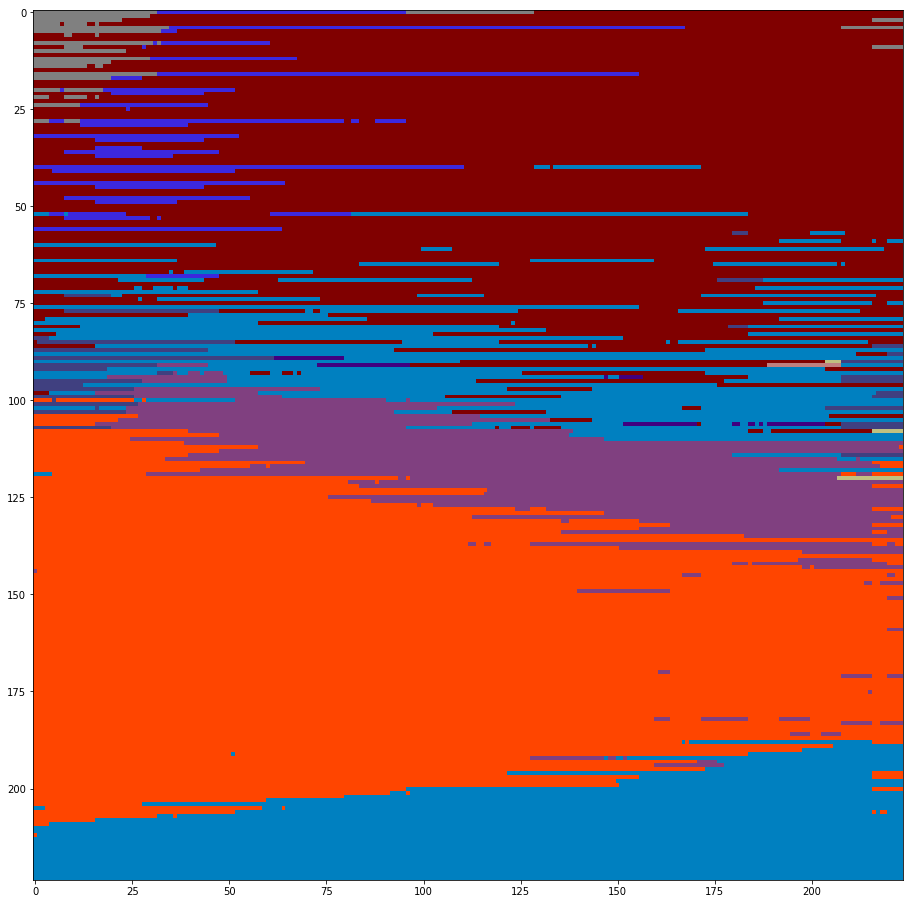

In [52]:
import matplotlib.pyplot as plt

print(test_data.shape)
print(result.shape)

# Sky = [128,128,128]
# Building = [128,0,0]
# Pole = [192,192,128]
# Road_marking = [255,69,0]
# Road = [128,64,128]
# Pavement = [60,40,222]
# Tree = [128,128,0]
# SignSymbol = [192,128,128]
# Fence = [64,64,128]
# Car = [64,0,128]
# Pedestrian = [64,64,0]
# Bicyclist = [0,128,192]
# Unlabelled = [0,0,0]

color_array = [
    [128,128,128],
    [128,0,0],
    [192,192,128],
    [255,69,0],
    [128,64,128],
    [60,40,222],
    [128,128,0],
    [192,128,128],
    [64,64,128],
    [64,0,128],
    [64,64,0],
    [0,128,192]
]

mask = np.zeros((224, 224, 3), dtype = np.uint8)

for i in range(224):
    for j in range(224):
        idx = np.argmax(result[0][i][j])
        mask[i][j] = color_array[idx]

plt.figure(figsize=(16, 16))
plt.imshow(test_data[0].astype(np.uint8))
plt.figure(figsize=(16, 16))
plt.imshow(mask)